In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load both datasets
def load_datasets(embedding_file_1, embedding_file_2):
    df1 = pd.read_excel(embedding_file_1)
    df2 = pd.read_excel(embedding_file_2)
    return df1, df2

# Prepare data for classification
def prepare_data(df1, df2, target_column_name):
    # Concatenate feature columns and target columns from both datasets
    X = pd.concat([df1.drop(columns=[target_column_name]), df2.drop(columns=[target_column_name])], axis=0)
    y = pd.concat([df1[target_column_name], df2[target_column_name]], axis=0)
    return X, y

# Split data into training and test sets
def split_data(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Train KNN classifier
def train_knn(X_train, y_train, n_neighbors=5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

# Evaluate the model using confusion matrix and other metrics
def evaluate_model(knn, X_train, X_test, y_train, y_test):
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Confusion matrix for training and test data
    train_confusion = confusion_matrix(y_train, y_train_pred)
    test_confusion = confusion_matrix(y_test, y_test_pred)
    
    # Classification report for precision, recall, and F1-score
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    return train_confusion, test_confusion, train_report, test_report

# Main program
if __name__ == "__main__":
    # File paths
    embedding_file_1 = "C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx"
    embedding_file_2 = "C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx"

    
    # Load datasets
    df1, df2 = load_datasets(embedding_file_1, embedding_file_2)
    
    # Prepare data
    # Using 'Judgement Status' as the target column
    X, y = prepare_data(df1, df2, target_column_name='Judgement Status')
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Train model
    knn = train_knn(X_train, y_train)
    
    # Evaluate model
    train_confusion, test_confusion, train_report, test_report = evaluate_model(knn, X_train, X_test, y_train, y_test)
    
    # Print results
    print("Training Confusion Matrix:\n", train_confusion)
    print("Test Confusion Matrix:\n", test_confusion)
    
    print("\nTraining Precision, Recall, and F1-Score:\n", pd.DataFrame(train_report).transpose())
    print("\nTest Precision, Recall, and F1-Score:\n", pd.DataFrame(test_report).transpose())
    
    # Based on the metrics, infer if the model is underfitting, regular fitting, or overfitting
    print("\nInference: Based on the training and test performance metrics, you can analyze if the model is underfitting, regular fitting, or overfitting.")


Training Confusion Matrix:
 [[ 99  69  19  11]
 [ 74 131  12  26]
 [ 69  69  53   9]
 [ 47  66  31  55]]
Test Confusion Matrix:
 [[22 43 11 12]
 [34 52 12 11]
 [31 35 15  9]
 [24 29 11  9]]

Training Precision, Recall, and F1-Score:
               precision    recall  f1-score     support
0              0.342561  0.500000  0.406571  198.000000
1              0.391045  0.539095  0.453287  243.000000
2              0.460870  0.265000  0.336508  200.000000
3              0.544554  0.276382  0.366667  199.000000
accuracy       0.402381  0.402381  0.402381    0.402381
macro avg      0.434757  0.395119  0.390758  840.000000
weighted avg   0.432608  0.402381  0.393950  840.000000

Test Precision, Recall, and F1-Score:
               precision    recall  f1-score     support
0              0.198198  0.250000  0.221106   88.000000
1              0.327044  0.477064  0.388060  109.000000
2              0.306122  0.166667  0.215827   90.000000
3              0.219512  0.123288  0.157895   73.00000

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load the datasets
embedding_file_1 ="C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx"
embedding_file_2 = "C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx"

df1 = pd.read_excel(embedding_file_1)
df2 = pd.read_excel(embedding_file_2)

# Assuming that the entire row represents the values we are predicting (just like vectors of predictions)
# Let's treat df1 as y_true and df2 as y_pred

def calculate_metrics(y_true, y_pred):
    # Mean Squared Error
    mse = mean_squared_error(y_true, y_pred)
    
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    
    # Mean Absolute Percentage Error (MAPE) - Exclude zero values in y_true to avoid division by zero
    non_zero_indices = y_true != 0
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    
    # R-squared (R²) Score
    r2 = r2_score(y_true, y_pred)
    
    return mse, rmse, mape, r2

# Main program
if __name__ == "__main__":
    # Convert the entire dataframes to numpy arrays and flatten them (to work as y_true and y_pred)
    y_true = df1.values.flatten()
    y_pred = df2.values.flatten()
    
    # Calculate the metrics
    mse, rmse, mape, r2 = calculate_metrics(y_true, y_pred)
    
    # Print the results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R-squared (R²) Score: {r2}")


Mean Squared Error (MSE): 0.024799150141676073
Root Mean Squared Error (RMSE): 0.15747745915424236
Mean Absolute Percentage Error (MAPE): 1004.2508369405457%
R-squared (R²) Score: 0.12940346776937928


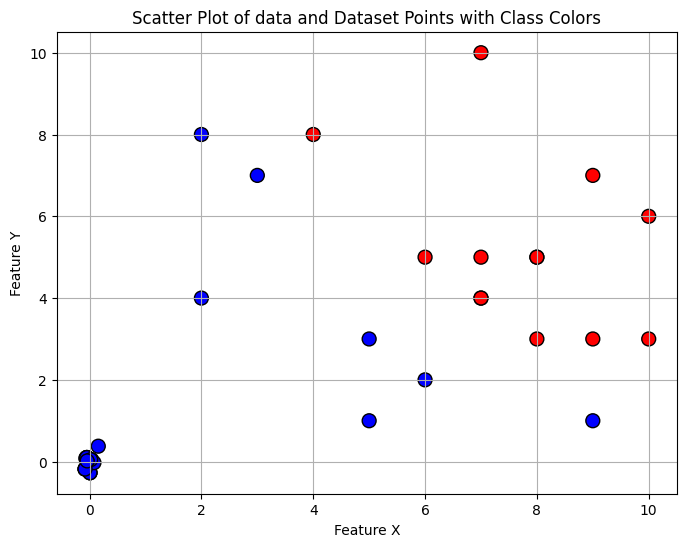

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
embedding_file_1 = "C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx"
embedding_file_2 = "C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx"


df1 = pd.read_excel(embedding_file_1)
df2 = pd.read_excel(embedding_file_2)

# Combine the datasets (we'll use only the first two columns as X and Y features)
combined_df = pd.concat([df1.iloc[:, :2], df2.iloc[:, :2]], axis=0).reset_index(drop=True)

# Step 1: Generate 20 data points with 2 features (X and Y), values between 1 and 10
np.random.seed(42)  # For reproducibility
X_random = np.random.randint(1, 11, size=(20, 2))  # 20 random points with values between 1 and 10

# Combine the random points with the first 20 points from the dataset
X_combined = np.vstack([X_random, combined_df.iloc[:20, :].values])

# Step 2: Assign classes based on a condition (e.g., sum of X and Y for random data)
classes_random = (X_combined[:, 0] + X_combined[:, 1] > 10).astype(int)  # Class assignment logic

# Step 3: Scatter plot the data points and color them based on their class
colors = np.where(classes_random == 0, 'blue', 'red')  # Blue for Class 0, Red for Class 1

# Step 4: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=colors, s=100, edgecolor='black')

# Step 5: Adding plot details
plt.title('Scatter Plot of data and Dataset Points with Class Colors')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()


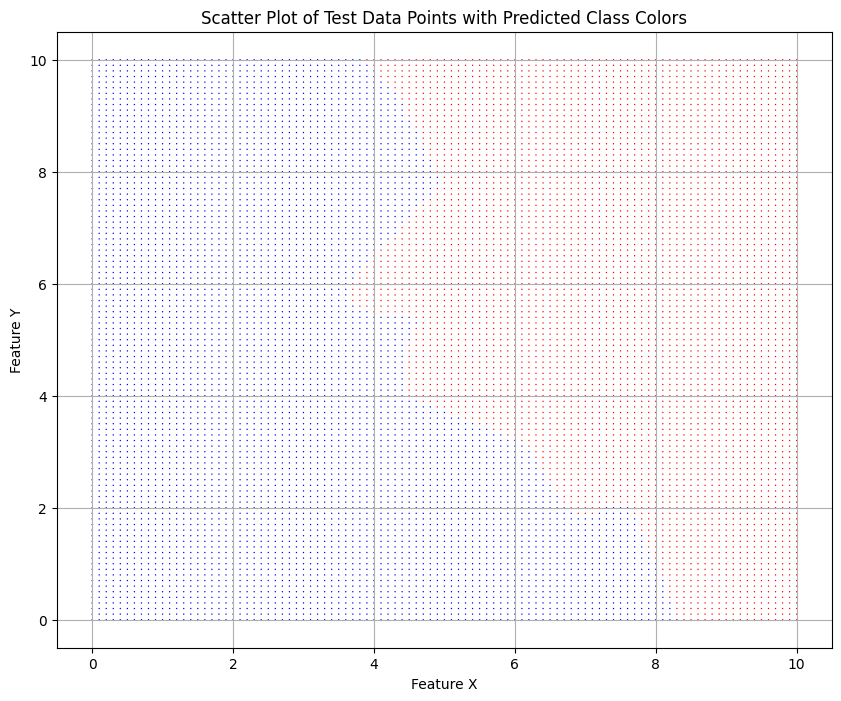

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the datasets
embedding_file_1 ="C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx"
embedding_file_2 = "C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx"

df1 = pd.read_excel(embedding_file_1)
df2 = pd.read_excel(embedding_file_2)

# Combine the datasets (we'll use only the first two columns as X and Y features)
combined_df = pd.concat([df1.iloc[:, :2], df2.iloc[:, :2]], axis=0).reset_index(drop=True)

# Generate 20 random data points for training, based on the question's previous task
np.random.seed(42)  # For reproducibility
X_train_random = np.random.randint(1, 11, size=(20, 2))

# Combine the random points with the first 20 points from the dataset
X_train_combined = np.vstack([X_train_random, combined_df.iloc[:20, :].values])

# Assign classes based on a condition (e.g., sum of X and Y for training data)
y_train_classes = (X_train_combined[:, 0] + X_train_combined[:, 1] > 10).astype(int)

# Step 1: Generate the test set with X and Y values varying between 0 and 10, with increments of 0.1
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test = np.array([[x, y] for x in x_values for y in y_values])  # Create a grid of 10,000 points

# Step 2: Train the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_combined, y_train_classes)

# Step 3: Predict the class for each test point
y_test_pred = knn.predict(X_test)

# Step 4: Scatter plot the test points and color them based on the predicted class
colors = np.where(y_test_pred == 0, 'blue', 'red')  # Blue for Class 0, Red for Class 1

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, edgecolor='none')

# Adding plot details
plt.title('Scatter Plot of Test Data Points with Predicted Class Colors')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()


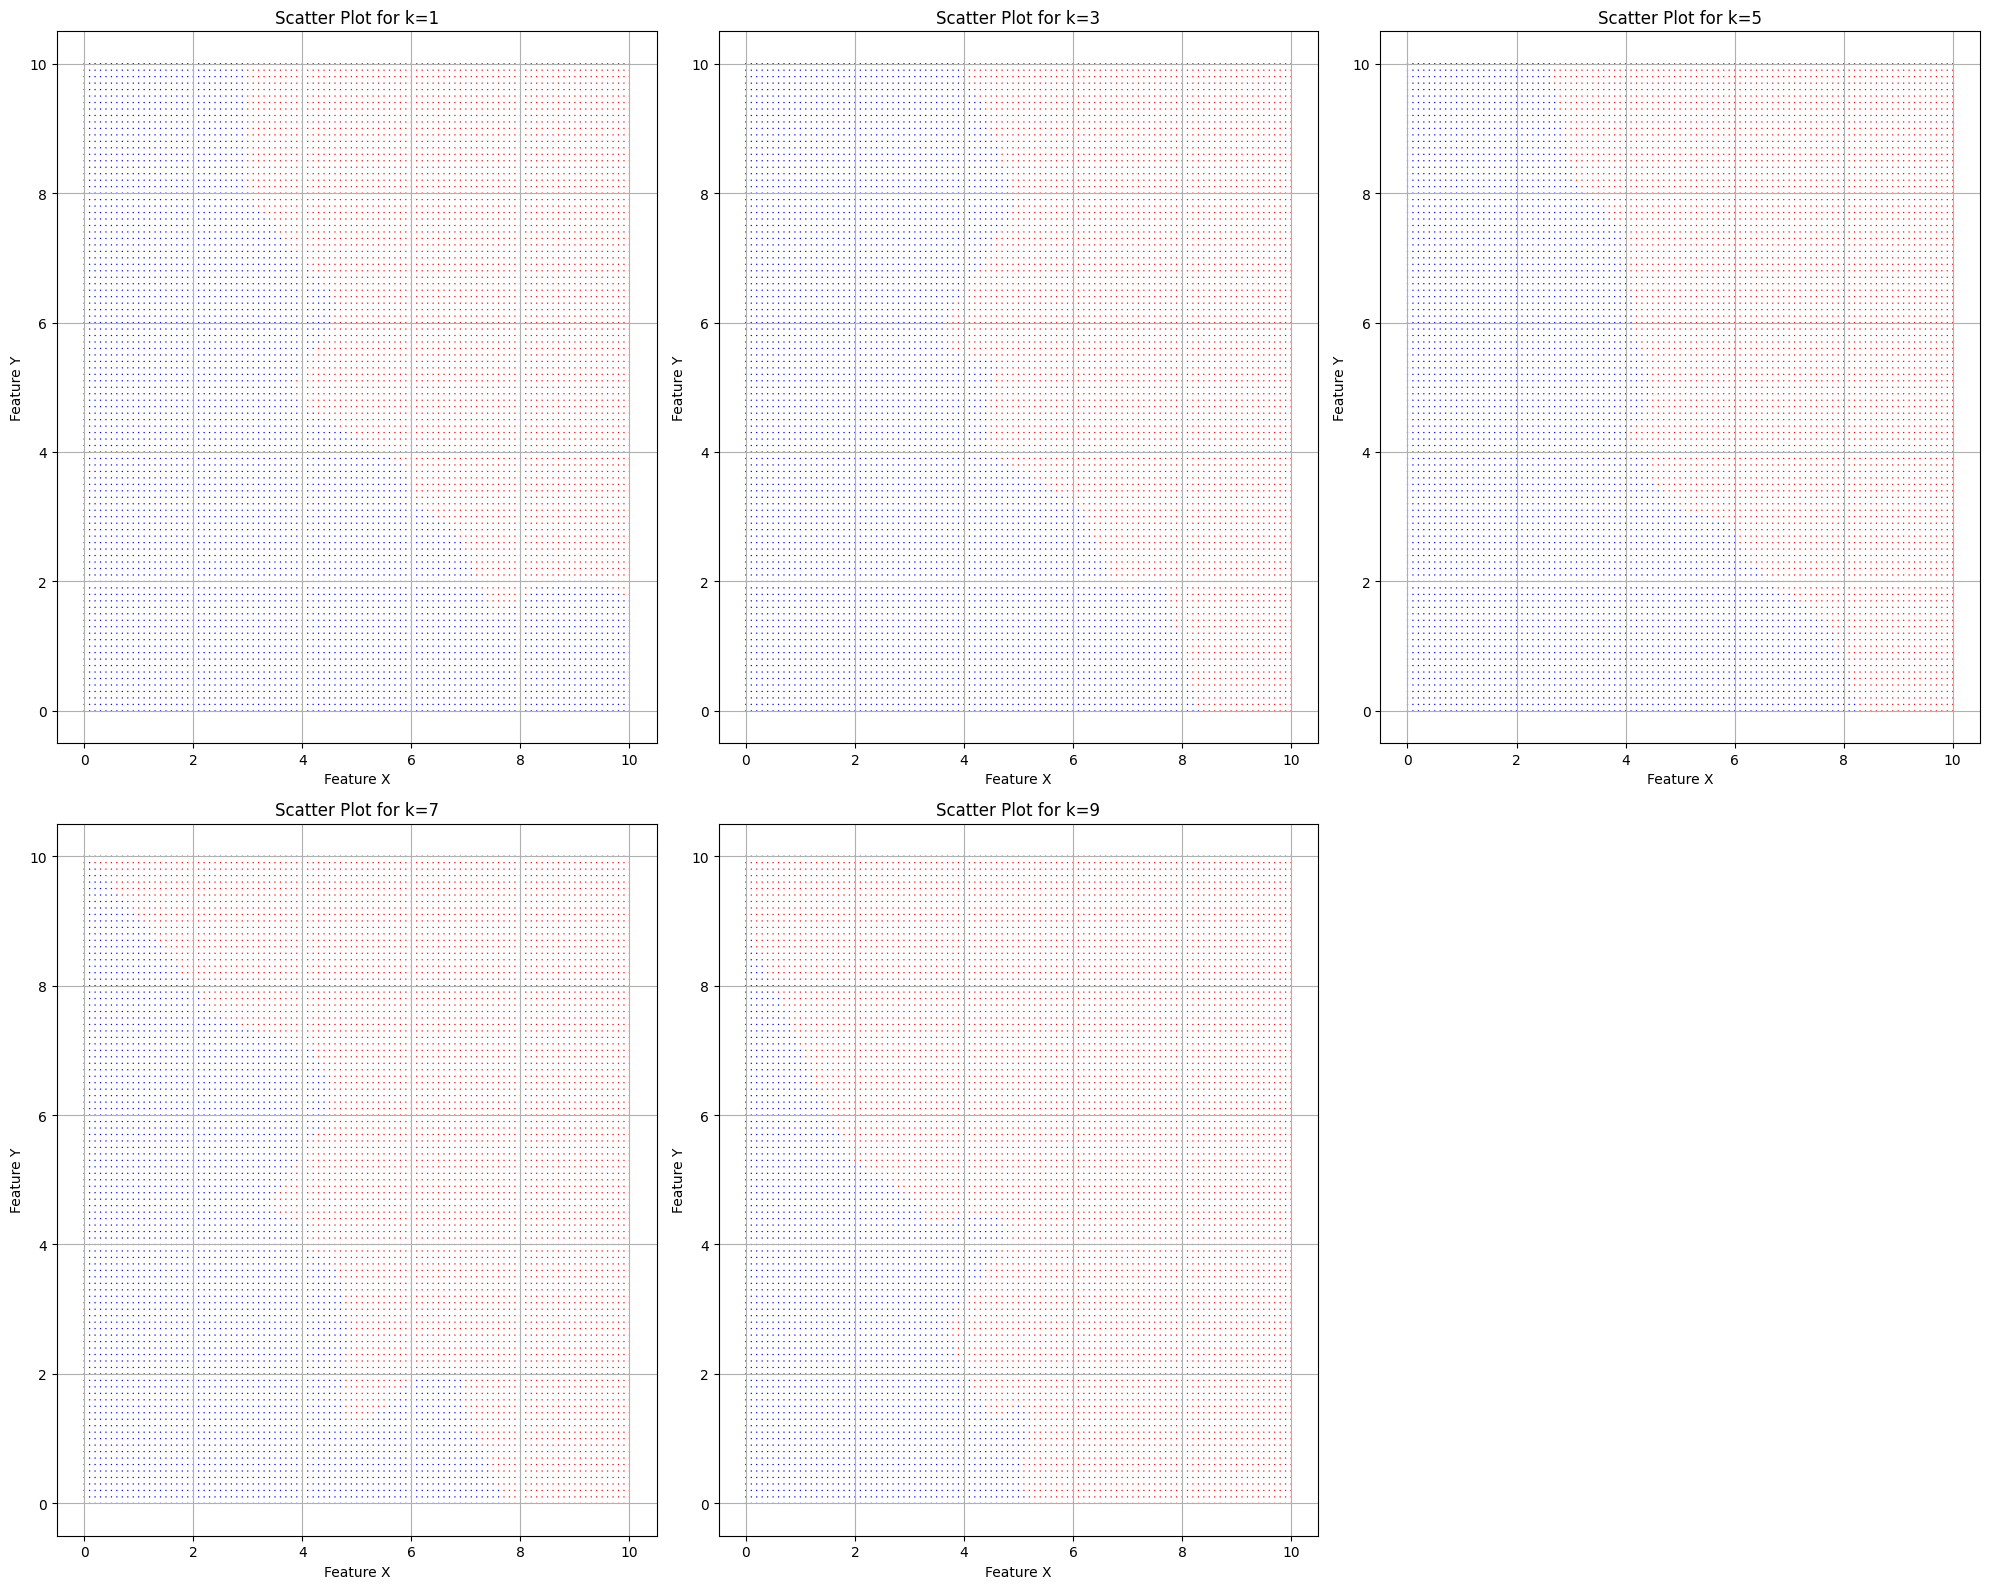

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the datasets
embedding_file_1 = "C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx"
embedding_file_2 = "C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx"


df1 = pd.read_excel(embedding_file_1)
df2 = pd.read_excel(embedding_file_2)

# Combine the datasets (we'll use only the first two columns as X and Y features)
combined_df = pd.concat([df1.iloc[:, :2], df2.iloc[:, :2]], axis=0).reset_index(drop=True)

# Generate 20 random data points for training, based on the question's previous task
np.random.seed(42)  # For reproducibility
X_train_random = np.random.randint(1, 11, size=(20, 2))

# Combine the random points with the first 20 points from the dataset
X_train_combined = np.vstack([X_train_random, combined_df.iloc[:20, :].values])

# Assign classes based on a condition (e.g., sum of X and Y for training data)
y_train_classes = (X_train_combined[:, 0] + X_train_combined[:, 1] > 10).astype(int)

# Generate the test set with X and Y values varying between 0 and 10, with increments of 0.1
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test = np.array([[x, y] for x in x_values for y in y_values])  # Create a grid of 10,000 points

# List of k values to test
k_values = [1, 3, 5, 7, 9]

# Create a plot for each value of k
plt.figure(figsize=(20, 16))
for i, k in enumerate(k_values, 1):
    # Train the k-NN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_combined, y_train_classes)

    # Predict the class for each test point
    y_test_pred = knn.predict(X_test)

    # Scatter plot the test points and color them based on the predicted class
    colors = np.where(y_test_pred == 0, 'blue', 'red')  # Blue for Class 0, Red for Class 1

    # Plot the results in a subplot
    plt.subplot(2, 3, i)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, edgecolor='none')
    plt.title(f'Scatter Plot for k={k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


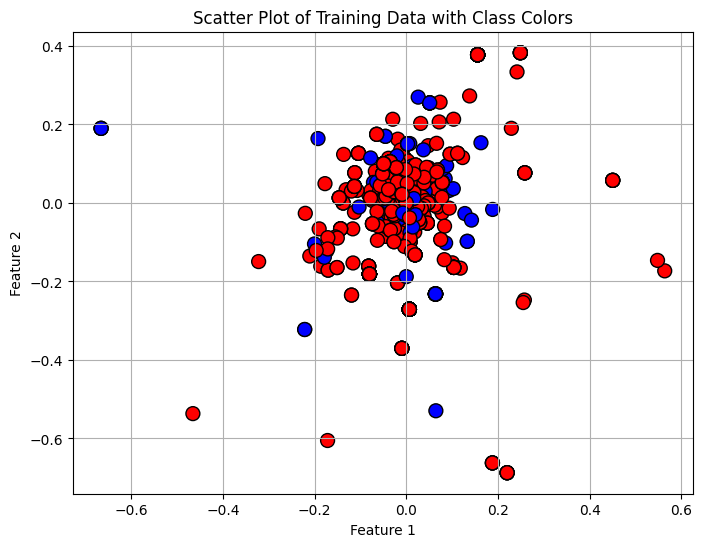

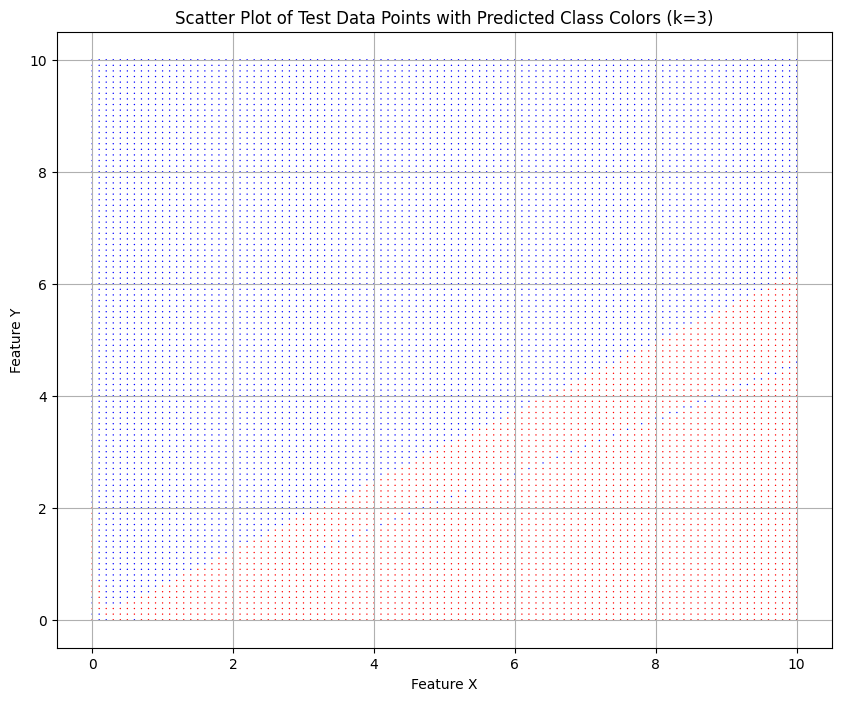

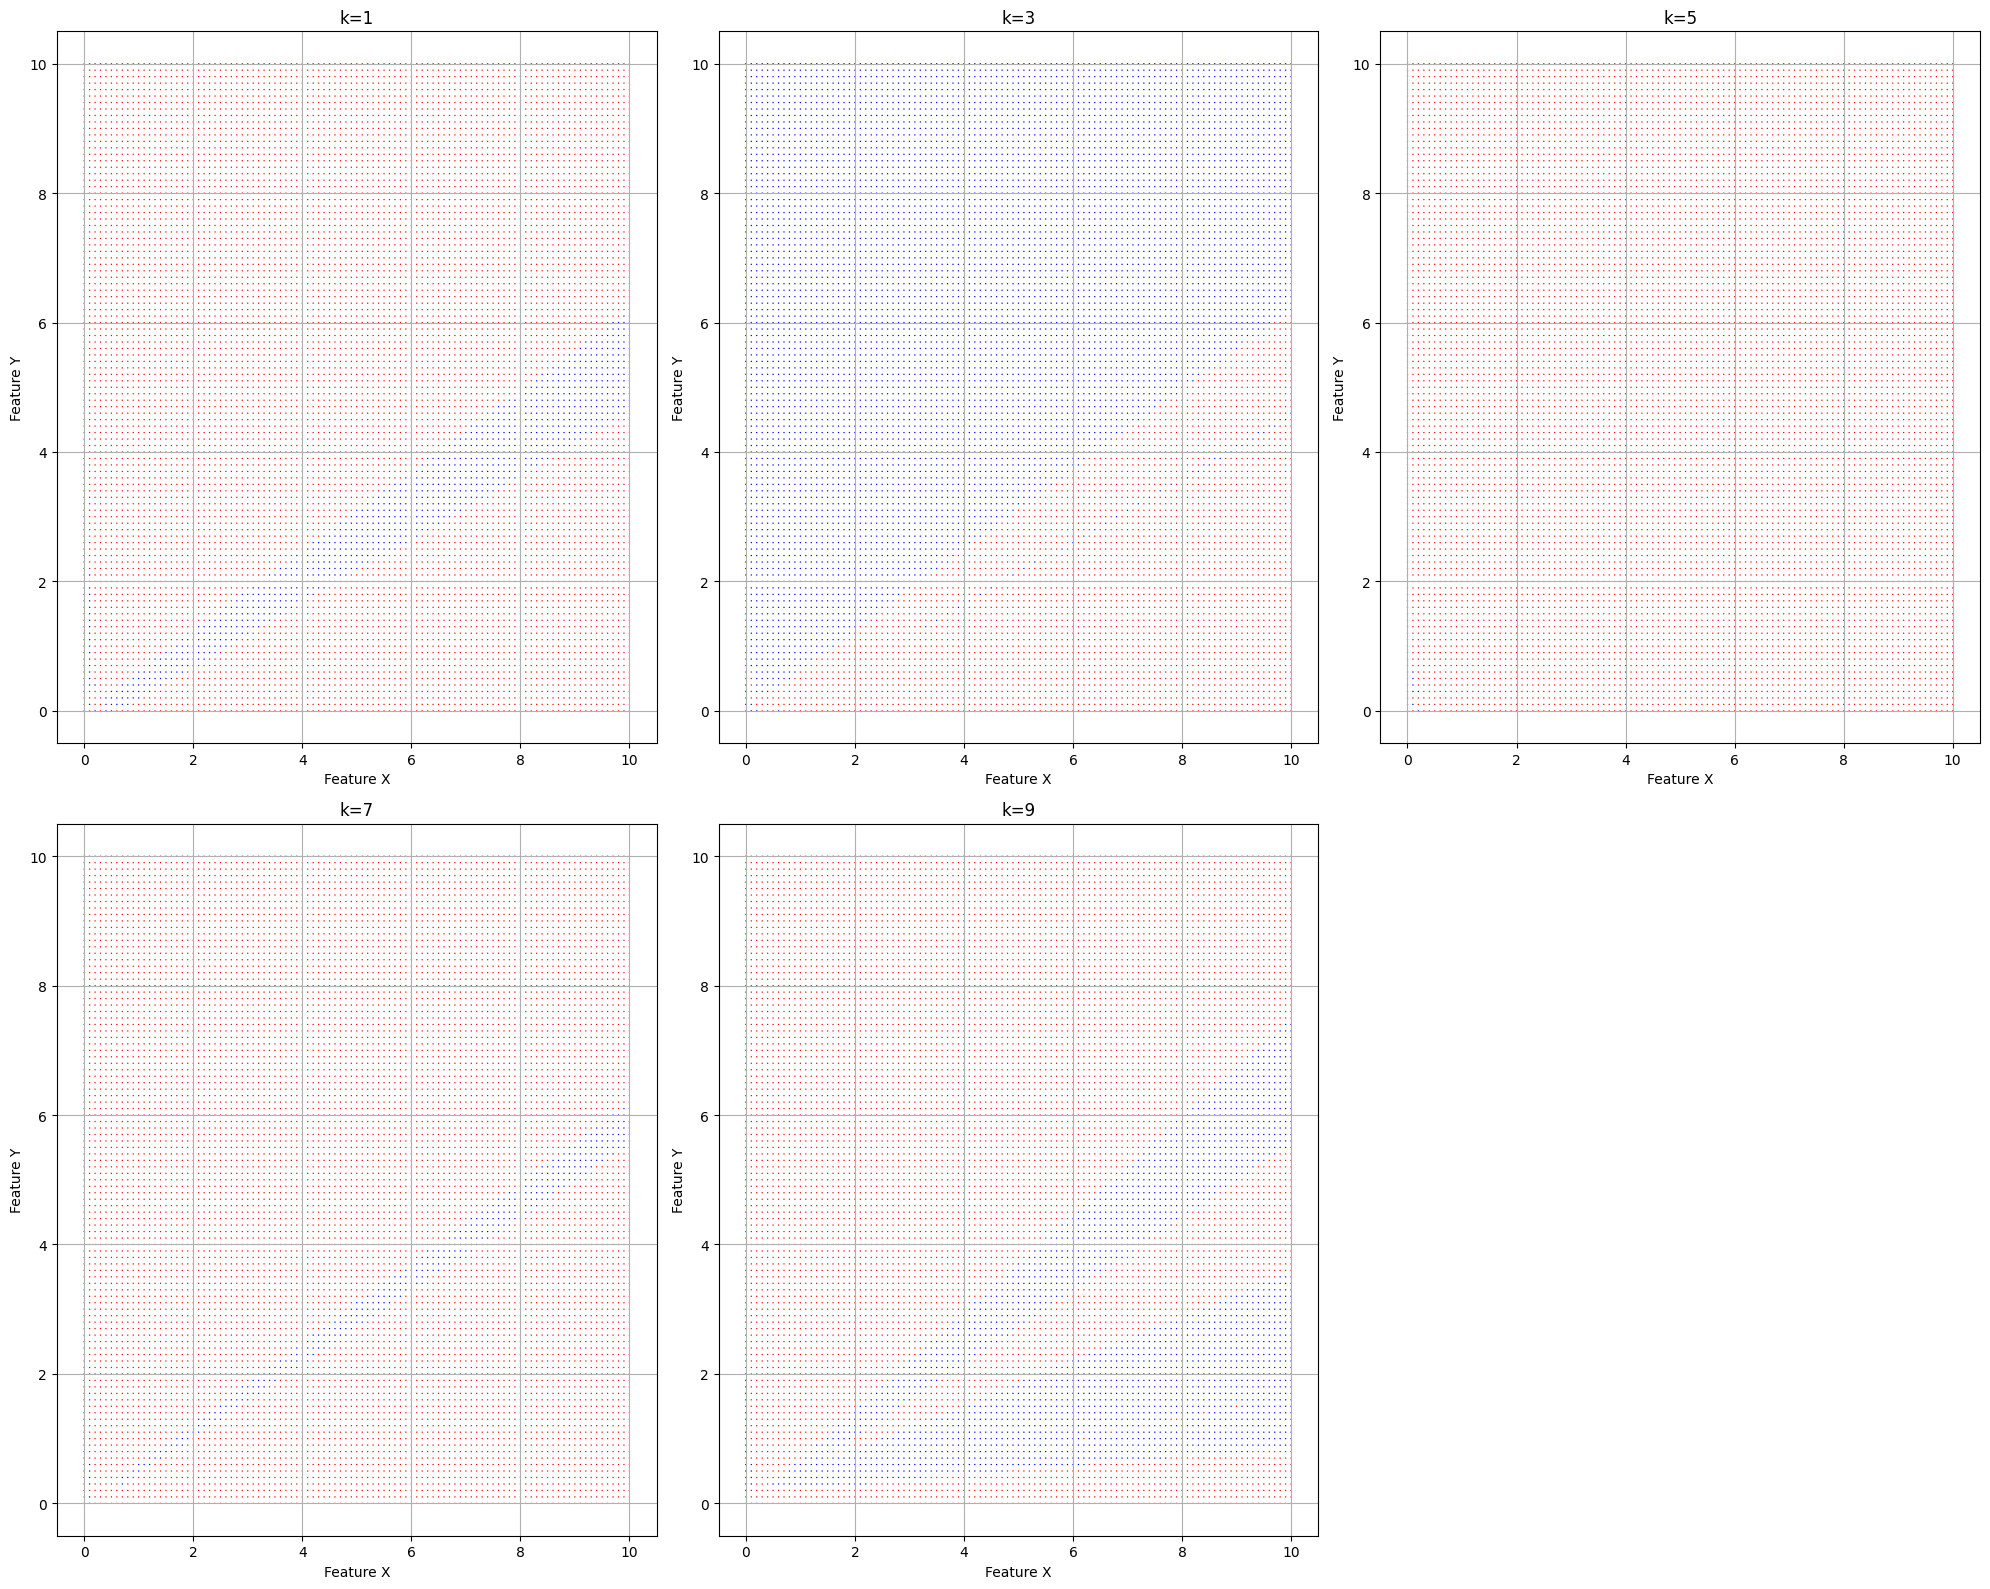

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the datasets
embedding_file_1 ="C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx"
embedding_file_2 = "C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx"


df1 = pd.read_excel(embedding_file_1)
df2 = pd.read_excel(embedding_file_2)

# Clean up column names to remove any extra spaces
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Combine the datasets (use iloc[] to select the first two columns)
combined_df = pd.concat([df1.iloc[:, :2], df2.iloc[:, :2]], axis=0).reset_index(drop=True)

# Access the 'Judgement Status' column using .loc
y_combined = pd.concat([df1['Judgement Status'], df2['Judgement Status']], axis=0).reset_index(drop=True).values

# Separate features
X_combined = combined_df.iloc[:, :2].values  # First two columns as features

# Exercise A3: Scatter plot of training data with classes
plt.figure(figsize=(8, 6))
colors = np.where(y_combined == 0, 'blue', 'red')  # Assuming binary classes for simplicity
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=colors, s=100, edgecolor='black')
plt.title('Scatter Plot of Training Data with Class Colors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Exercise A4: Generate test set data, classify it using k-NN (k=3), and plot the results
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test = np.array([[x, y] for x in x_values for y in y_values])  # Create a grid of 10,000 points

# Train k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_combined, y_combined)

# Predict the class for the test set
y_test_pred = knn.predict(X_test)

# Scatter plot the test points and color them based on the predicted class
colors = np.where(y_test_pred == 0, 'blue', 'red')  # Blue for Class 0, Red for Class 1
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, edgecolor='none')
plt.title('Scatter Plot of Test Data Points with Predicted Class Colors (k=3)')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

# Exercise A5: Repeat classification with varying values of k and observe class boundaries
k_values = [1, 3, 5, 7, 9]

plt.figure(figsize=(20, 16))
for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_combined, y_combined)
    y_test_pred = knn.predict(X_test)
    colors = np.where(y_test_pred == 0, 'blue', 'red')
    
    plt.subplot(2, 3, i)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, edgecolor='none')
    plt.title(f'k={k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the datasets
embedding_file_1 ="C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx"
embedding_file_2 = "C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx"

df1 = pd.read_excel(embedding_file_1)
df2 = pd.read_excel(embedding_file_2)

# Clean up column names to remove any extra spaces
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Check for NaN or infinite values in both datasets
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna()
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna()

# Combine the datasets (use iloc[] to select the first two columns)
combined_df = pd.concat([df1.iloc[:, :2], df2.iloc[:, :2]], axis=0).reset_index(drop=True)

# Access the 'Judgement Status' column
y_combined = pd.concat([df1['Judgement Status'], df2['Judgement Status']], axis=0).reset_index(drop=True).values

# Separate features
X_combined = combined_df.iloc[:, :2].values  # First two columns as features

# Define the parameter grid for 'k' values
param_grid = {'n_neighbors': np.arange(1, 31, 2)}  # Odd numbers from 1 to 30

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search.fit(X_combined, y_combined)

# Print the best parameters and the best score
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")


Best k value: 1
Best cross-validated accuracy: 0.2817
